# Importing required Modules and Libraries

In [703]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [704]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Importing Train/Test Covid 19 Dataset

In [705]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_train1=pd.read_excel(r'C:\Users\Sony\Desktop\covid-train-cleaned.xlsx')

In [706]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_test1=pd.read_excel(r'C:\Users\Sony\Desktop\covid-test.xlsx')


checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.

the head() function used to view the preview of the data for given number of rows,if no value is given then bydefault it will display first five rows.

# More Data Exploration (Train/Test Datasets)

In [707]:
#checking first five rows from top
df_train1.head()

,PATIENT_ID,RE_DATE,age,gender,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein
0,1.0,2020-02-17 08:31:00,73,1,0,NaN,NaN,NaN
1,2.0,2020-02-17 12:26:00,61,1,0,9.2,NaN,NaN
2,NaN,2020-02-17 13:59:00,61,1,0,NaN,282.0,NaN
3,NaN,2020-02-17 15:34:00,61,1,0,NaN,NaN,NaN
4,3.0,2020-02-06 23:15:00,70,2,0,NaN,NaN,NaN


In [708]:
df_test1.head()

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1.0,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,NaN,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,NaN,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,NaN,2020-02-13 10:06:00,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,2.0,2020-02-09 06:56:00,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0



Once the importing of the dataset is done,we get the rough idea of the dataset as below-- this dataset contains features necessary to check the outcome of the covid 19 confirmed patients. so here "outcome" is the dependent or output variable. it is the time to understand thid dataset Let's start it with checking the number of rows and columns in the given Dataset-->

In [709]:
#checking number of rows and columns of train/test datasets
df_train1.shape,df_test1.shape

((1117, 8), (757, 8))

Now lets check the name of all the columns this dataset have so that it is easy for us to -- --view the names of columns in easier way and make further analysis on them-->

In [710]:
#checking names of columns for both datasets
df_train1.columns

Index(['PATIENT_ID', 'RE_DATE', 'age', 'gender', 'outcome', '(%)lymphocyte',
       'Lactate dehydrogenase', 'Hypersensitive c-reactive protein'],
      dtype='object')

In [711]:
df_test1.columns

Index(['PATIENT_ID', 'RE_DATE', 'Lactate dehydrogenase',
       'Hypersensitive c-reactive protein', '(%)lymphocyte', 'Admission time',
       'Discharge time', 'outcome'],
      dtype='object')

In the above output we can clearly see the names of all columns. now by observing the dataset and column names it is clear that feature "outcome" is dependent-- --variable and all other features are independent. For further analysis we have to check the datatypes of values of each column-->

In [712]:
#checking the datatypes
df_train1.dtypes

PATIENT_ID                                  float64
RE_DATE                              datetime64[ns]
age                                           int64
gender                                        int64
outcome                                       int64
(%)lymphocyte                               float64
Lactate dehydrogenase                       float64
Hypersensitive c-reactive protein           float64
dtype: object

In [713]:
df_test1.dtypes

PATIENT_ID                                  float64
RE_DATE                              datetime64[ns]
Lactate dehydrogenase                       float64
Hypersensitive c-reactive protein           float64
(%)lymphocyte                               float64
Admission time                       datetime64[ns]
Discharge time                       datetime64[ns]
outcome                                       int64
dtype: object

# Checking the Missing Values in Datasets

from above output,it is clearly visible that all the values of each column are either float type-- or integer type. one thing to be noticed here is that only output variable is in integer type ,all other variables-- --are in float type. Now lets check for sum of the missing values in each column-->

In [714]:
df_train1.isnull().sum()

PATIENT_ID                           756
RE_DATE                                1
age                                    0
gender                                 0
outcome                                0
(%)lymphocyte                        942
Lactate dehydrogenase                957
Hypersensitive c-reactive protein    993
dtype: int64

there are so many missing values showing in above dataset because test of same patient done in different dates.
Lets deal with this problem-->

In [715]:
df_test1.isnull().sum()

PATIENT_ID                           647
RE_DATE                                0
Lactate dehydrogenase                397
Hypersensitive c-reactive protein    472
(%)lymphocyte                        384
Admission time                         0
Discharge time                         0
outcome                                0
dtype: int64

# Data Preprocessing

Now as we can have taken visiting dates as most recent ones so for further analysis of the dataset we will not be needing this column.
Hence dropping the columns "RE_Date",'age','gender'

In [716]:
#dropping columns 'RE_DATE','age' and 'gender' from training dataset
df_train1.drop('RE_DATE',axis=1,inplace=True)
df_train1.drop('age',axis=1,inplace=True)
df_train1.drop('gender',axis=1,inplace=True)

In [717]:
#dropping columns 'RE_DATE','Admission time','Discharge time' from test dataset
df_test1.drop('RE_DATE',axis=1,inplace=True)
df_test1.drop('Admission time',axis=1,inplace=True)
df_test1.drop('Discharge time',axis=1,inplace=True)

In [718]:
df_train1.head()

,PATIENT_ID,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein
0,1.0,0,NaN,NaN,NaN
1,2.0,0,9.2,NaN,NaN
2,NaN,0,NaN,282.0,NaN
3,NaN,0,NaN,NaN,NaN
4,3.0,0,NaN,NaN,NaN


In [719]:
df_test1.head()

,PATIENT_ID,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,outcome
0,1.0,NaN,NaN,28.0,0
1,NaN,183.0,5.1,NaN,0
2,NaN,NaN,NaN,28.6,0
3,NaN,194.0,2.7,NaN,0
4,2.0,NaN,NaN,28.3,0


# M1 Model Missing Values Imputation By  '-1'


Missing values imputation by -1 for all columns accept 'PATIENT_ID','AGE' and 'Gender'

In [720]:
df_train1.columns

Index(['PATIENT_ID', 'outcome', '(%)lymphocyte', 'Lactate dehydrogenase',
       'Hypersensitive c-reactive protein'],
      dtype='object')

In [721]:

#Missing values imputation by -1 for all columns accept 'PATIENT_ID','AGE' and 'Gender'

cols = ['(%)lymphocyte',
       'Lactate dehydrogenase', 'Hypersensitive c-reactive protein']
for col in cols:
    print('Imputation with -1: %s' % (col))
    df_train1[col].fillna(-1, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with -1: (%)lymphocyte
Imputation with -1: Lactate dehydrogenase
Imputation with -1: Hypersensitive c-reactive protein
Missing value imputation done.


In [722]:
#Missing values imputation by 0(zero) for columns 'PATIENT_ID','AGE' and 'Gender'

cols = ['PATIENT_ID']
for col in cols:
    print('Imputation with zero: %s' % (col))
    df_train1[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with zero: PATIENT_ID
Missing value imputation done.


In [723]:
df_test1.columns

Index(['PATIENT_ID', 'Lactate dehydrogenase',
       'Hypersensitive c-reactive protein', '(%)lymphocyte', 'outcome'],
      dtype='object')

In [724]:
'''
Missing values imputation
'''
cols = ['Lactate dehydrogenase',
       'Hypersensitive c-reactive protein', '(%)lymphocyte', 'outcome']
for col in cols:
    print('Imputation with -1: %s' % (col))
    df_test1[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with -1: Lactate dehydrogenase
Imputation with -1: Hypersensitive c-reactive protein
Imputation with -1: (%)lymphocyte
Imputation with -1: outcome
Missing value imputation done.


In [725]:

cols = ['PATIENT_ID']
for col in cols:
    print('Imputation with zero: %s' % (col))
    df_test1[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with zero: PATIENT_ID
Missing value imputation done.


# Checking Dataset after Missing Values Imputation

In [726]:
df_train1.isnull().sum()

PATIENT_ID                           0
outcome                              0
(%)lymphocyte                        0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
dtype: int64

In [727]:
df_test1.isnull().sum()

PATIENT_ID                           0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
(%)lymphocyte                        0
outcome                              0
dtype: int64

# "Data has been cleaned for M1 Model building"

# Correlation Analysis 

In [728]:
display(df_train1.corr())

,PATIENT_ID,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein
PATIENT_ID,1.000000,0.118176,0.124500,-0.077690,-0.071513
outcome,0.118176,1.000000,-0.180752,0.169124,0.167602
(%)lymphocyte,0.124500,-0.180752,1.000000,-0.083207,-0.058239
Lactate dehydrogenase,-0.077690,0.169124,-0.083207,1.000000,0.587101
Hypersensitive c-reactive protein,-0.071513,0.167602,-0.058239,0.587101,1.000000


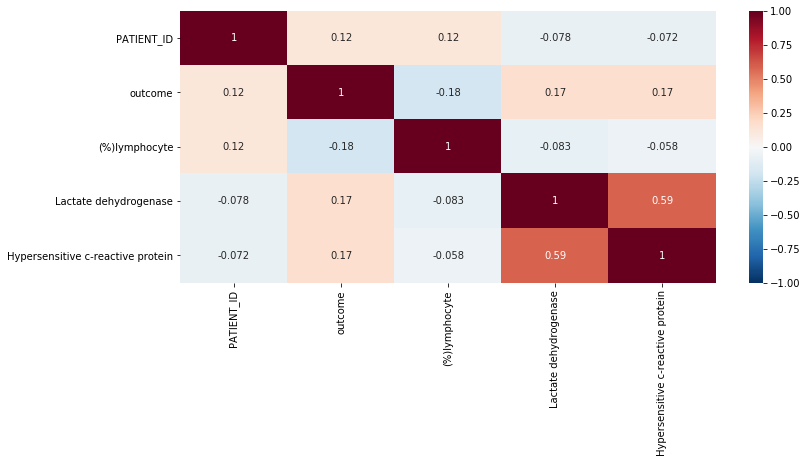

In [729]:
correlation = df_train1.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Univariate and Bivariate Analysis

In [730]:
#lets check for 'outcome' variable.
df_train1.outcome.value_counts().sort_index()

0    430
1    687
Name: outcome, dtype: int64

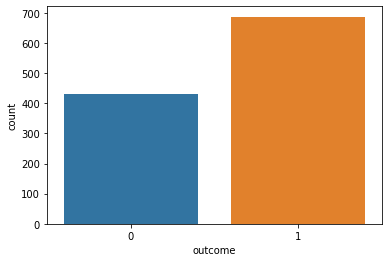

In [731]:
#plotting the graph for visualizing better the distribution of "outcome" variable.
sns.countplot(x='outcome', data=df_train1)

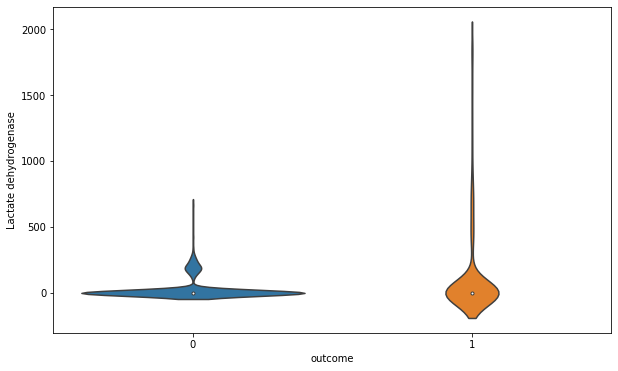

In [732]:
#plotting graph between 'outcome' and 'lactate dehydrogenase' variables
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'outcome', y = 'Lactate dehydrogenase', data = df_train1)

# Separating target and input variables

In [733]:
'''Learning Features and Predicting Features'''
x_train = df_train1.drop(['PATIENT_ID','outcome'], axis = 1)
y_train = df_train1['outcome']

In [734]:
x_train.head()

,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein
0,-1.0,-1.0,-1.0
1,9.2,-1.0,-1.0
2,-1.0,282.0,-1.0
3,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0


In [735]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [736]:
'''Learning Features and Predicting Features'''
x_test = df_test1.drop(['PATIENT_ID','outcome'], axis = 1)
y_test = df_test1['outcome']

In [737]:
x_train.columns

Index(['(%)lymphocyte', 'Lactate dehydrogenase',
       'Hypersensitive c-reactive protein'],
      dtype='object')

In [738]:
x_test.columns

Index(['Lactate dehydrogenase', 'Hypersensitive c-reactive protein',
       '(%)lymphocyte'],
      dtype='object')

In [739]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1117, 3), (1117,), (757, 3), (757,))

# Applying Standardiztion Technique to get optimized results through Standard Scaler

In [740]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# M1 Model Building

# Model Selection/Building for M1

In [741]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [742]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [743]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.2813738441215324
[[ 22 463]
 [ 81 191]]
              precision    recall  f1-score   support

           0       0.21      0.05      0.07       485
           1       0.29      0.70      0.41       272

    accuracy                           0.28       757
   macro avg       0.25      0.37      0.24       757
weighted avg       0.24      0.28      0.20       757


 
0.36723910171730517
[[217 268]
 [211  61]]
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       485
           1       0.19      0.22      0.20       272

    accuracy                           0.37       757
   macro avg       0.35      0.34      0.34       757
weighted avg       0.39      0.37      0.38       757


 
0.3474240422721268
[[ 22 463]
 [ 31 241]]
              precision    recall  f1-score   support

           0       0.42      0.05      0.08       485
           1       0.34      0.89      0.49       272

    accuracy                           0.35      

# Checking Consistency on KNN Model using Cross Validation

In [744]:
from sklearn.neighbors import KNeighborsClassifier as knn
score=cross_val_score(knn(n_neighbors=18,),X=x_train, y=y_train,cv=10)
score

array([0.55357143, 0.54464286, 0.5625    , 0.53571429, 0.5625    ,
       0.57142857, 0.54464286, 0.56756757, 0.55855856, 0.53153153])

In [745]:
score.mean()*100,score.std()*100
clf=knn(n_neighbors=18)
clf.fit(x_train,y_train)
score1=clf.score(x_train,y_train)
score=clf.score(x_test,y_test)
score1,score

(0.5550581915846016, 0.309114927344782)

# M2 Model building process

# 1.Imputation of missing values with appropriate values 

In [746]:
#importing train/test datasets
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_train2=pd.read_excel(r'C:\Users\Sony\Desktop\covid-train-cleaned.xlsx')

In [747]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_test2=pd.read_excel(r'C:\Users\Sony\Desktop\covid-test.xlsx')

In [748]:
#removing irrelevant columns from both datasets
#dropping columns 'RE_DATE','age' and 'gender' from training dataset
df_train2.drop('RE_DATE',axis=1,inplace=True)
df_train2.drop('age',axis=1,inplace=True)
df_train2.drop('gender',axis=1,inplace=True)

In [749]:
#dropping columns 'RE_DATE','Admission time','Discharge time' from test dataset
df_test2.drop('RE_DATE',axis=1,inplace=True)
df_test2.drop('Admission time',axis=1,inplace=True)
df_test2.drop('Discharge time',axis=1,inplace=True)

In [750]:
df_train2.head()

,PATIENT_ID,outcome,(%)lymphocyte,Lactate dehydrogenase,Hypersensitive c-reactive protein
0,1.0,0,NaN,NaN,NaN
1,2.0,0,9.2,NaN,NaN
2,NaN,0,NaN,282.0,NaN
3,NaN,0,NaN,NaN,NaN
4,3.0,0,NaN,NaN,NaN


In [751]:
df_test2.head()

,PATIENT_ID,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,outcome
0,1.0,NaN,NaN,28.0,0
1,NaN,183.0,5.1,NaN,0
2,NaN,NaN,NaN,28.6,0
3,NaN,194.0,2.7,NaN,0
4,2.0,NaN,NaN,28.3,0


In [752]:
#checking missing values
df_train2.isnull().sum()

PATIENT_ID                           756
outcome                                0
(%)lymphocyte                        942
Lactate dehydrogenase                957
Hypersensitive c-reactive protein    993
dtype: int64

In [753]:
df_test2.isnull().sum()

PATIENT_ID                           647
Lactate dehydrogenase                397
Hypersensitive c-reactive protein    472
(%)lymphocyte                        384
outcome                                0
dtype: int64

# Model2 (M2) Missing Values Impution with Mean

In [754]:
df_train2=df_train2.fillna(df_train2.mean())

In [755]:
df_train2.isnull().sum()

PATIENT_ID                           0
outcome                              0
(%)lymphocyte                        0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
dtype: int64

In [756]:
df_test2=df_test2.fillna(df_train2.mean())

In [757]:
df_test2.isnull().sum()

PATIENT_ID                           0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
(%)lymphocyte                        0
outcome                              0
dtype: int64

# M2 Model Processing/Selection/Building

# 2.Seperating Input/Output variables


In [758]:
'''Learning Features and Predicting Features'''
x_train2 = df_train2.drop(['PATIENT_ID','outcome'], axis = 1)
y_train2 = df_train2['outcome']

In [759]:
'''Learning Features and Predicting Features'''
x_test2 = df_test2.drop(['PATIENT_ID','outcome'], axis = 1)
y_test2 = df_test2['outcome']

In [760]:
x_train2.shape,y_train2.shape,x_test2.shape,y_test2.shape

((1117, 3), (1117,), (757, 3), (757,))

# 3.Applying Standardiztion Technique to get optimized results through Standard Scaler

In [761]:
sc = StandardScaler()
x_train2=sc.fit_transform(x_train2)
x_test2=sc.fit_transform(x_test2)

# 4.Model Selection/Building for M2

In [762]:
model2=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [763]:
for m in model2:
    m.fit(x_train2,y_train2)
    m.score(x_train2,y_train2)
    predm=m.predict(x_test2)
    print(accuracy_score(y_test2,predm))
    print(confusion_matrix(y_test2,predm))
    print(classification_report(y_test2,predm))
    print('\n ')

0.17569352708058125
[[ 39 446]
 [178  94]]
              precision    recall  f1-score   support

           0       0.18      0.08      0.11       485
           1       0.17      0.35      0.23       272

    accuracy                           0.18       757
   macro avg       0.18      0.21      0.17       757
weighted avg       0.18      0.18      0.15       757


 
0.42800528401585203
[[100 385]
 [ 48 224]]
              precision    recall  f1-score   support

           0       0.68      0.21      0.32       485
           1       0.37      0.82      0.51       272

    accuracy                           0.43       757
   macro avg       0.52      0.51      0.41       757
weighted avg       0.57      0.43      0.39       757


 
0.3130779392338177
[[  0 485]
 [ 35 237]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.33      0.87      0.48       272

    accuracy                           0.31     

In [764]:
# Checking Consistency on KNN Model using Cross Validation
from sklearn.neighbors import KNeighborsClassifier as knn
score2=cross_val_score(knn(n_neighbors=18,),X=x_train2, y=y_train2,cv=10)
score2

array([0.54464286, 0.53571429, 0.54464286, 0.53571429, 0.55357143,
       0.54464286, 0.53571429, 0.56756757, 0.54954955, 0.52252252])

In [765]:
score2.mean()*100,score.std()*100
clf=knn(n_neighbors=18)
clf.fit(x_train2,y_train2)
score22=clf.score(x_train2,y_train2)
score2=clf.score(x_test2,y_test2)
score22,score2

(0.5452103849597135, 0.29722589167767505)

# M3 Model building process

Task: Taking the relevant rows of a patient,padding missing values with -1 and creating model which has highest accuracy score

# 1.Importing Train/Test datasets

In [766]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_train3=pd.read_excel(r'C:\Users\Sony\Desktop\covid-train-cleaned.xlsx')

In [767]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_test3=pd.read_excel(r'C:\Users\Sony\Desktop\covid-test3.xlsx')

# 1.Imputation of missing values with '-1'

In [768]:
#removing irrelevant columns from both datasets
#dropping columns 'RE_DATE','age' and 'gender' from training dataset
df_train3.drop('RE_DATE',axis=1,inplace=True)
df_train3.drop('age',axis=1,inplace=True)
df_train3.drop('gender',axis=1,inplace=True)

In [769]:
#dropping columns 'RE_DATE','Admission time','Discharge time' from test dataset
df_test3.drop('RE_DATE',axis=1,inplace=True)
df_test3.drop('Admission time',axis=1,inplace=True)
df_test3.drop('Discharge time',axis=1,inplace=True)

In [770]:
#checking missing values
df_train3.isnull().sum()

PATIENT_ID                           756
outcome                                0
(%)lymphocyte                        942
Lactate dehydrogenase                957
Hypersensitive c-reactive protein    993
dtype: int64

In [771]:
df_test3.isnull().sum()

PATIENT_ID                           605
Lactate dehydrogenase                374
Hypersensitive c-reactive protein    445
(%)lymphocyte                        361
outcome                                0
dtype: int64

# Model 3 (M3) Missing Values Impution with '-1'

In [772]:
#Missing values imputation by -1 for all columns accept 'PATIENT_ID','AGE' and 'Gender'

cols = ['(%)lymphocyte',
       'Lactate dehydrogenase', 'Hypersensitive c-reactive protein']
for col in cols:
    print('Imputation with -1: %s' % (col))
    df_train3[col].fillna(-1, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with -1: (%)lymphocyte
Imputation with -1: Lactate dehydrogenase
Imputation with -1: Hypersensitive c-reactive protein
Missing value imputation done.


In [773]:
#Missing values imputation by 0(zero) for columns 'PATIENT_ID','AGE' and 'Gender'

cols = ['PATIENT_ID']
for col in cols:
    print('Imputation with zero: %s' % (col))
    df_train3[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with zero: PATIENT_ID
Missing value imputation done.


In [774]:

#Missing values imputation

cols = ['Lactate dehydrogenase',
       'Hypersensitive c-reactive protein', '(%)lymphocyte', 'outcome']
for col in cols:
    print('Imputation with -1: %s' % (col))
    df_test3[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with -1: Lactate dehydrogenase
Imputation with -1: Hypersensitive c-reactive protein
Imputation with -1: (%)lymphocyte
Imputation with -1: outcome
Missing value imputation done.


In [775]:
cols = ['PATIENT_ID']
for col in cols:
    print('Imputation with zero: %s' % (col))
    df_test3[col].fillna(0, inplace=True)
    
    
print('Missing value imputation done.')

Imputation with zero: PATIENT_ID
Missing value imputation done.


In [776]:
df_train3.isnull().sum()

PATIENT_ID                           0
outcome                              0
(%)lymphocyte                        0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
dtype: int64

In [777]:
df_test3.isnull().sum()

PATIENT_ID                           0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
(%)lymphocyte                        0
outcome                              0
dtype: int64

# 2.Seperating Input/Output variables

In [778]:
'''Learning Features and Predicting Features'''
x_train3 = df_train3.drop(['PATIENT_ID','outcome'], axis = 1)
y_train3 = df_train3['outcome']

In [779]:
'''Learning Features and Predicting Features'''
x_test3 = df_test3.drop(['PATIENT_ID','outcome'], axis = 1)
y_test3 = df_test3['outcome']

In [780]:
x_train3.shape,y_train3.shape,x_test3.shape,y_test3.shape

((1117, 3), (1117,), (715, 3), (715,))

# 3.Applying Standardiztion Technique to get optimized results through Standard Scaler

In [781]:
sc = StandardScaler()
x_train3=sc.fit_transform(x_train3)
x_test3=sc.fit_transform(x_test3)

# 4.Model Selection/Building for M3

# using SVM Model

In [782]:
'''Creating Object of SVM'''
from sklearn import svm

svmModel3 = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel3.fit(x_train3, y_train3)
'''Predicting for Training Set'''
y_pred3 = svmModel3.predict(x_test3)
'''Accuracy Score'''
result_acc3 = accuracy_score(y_test3,y_pred3)

In [783]:
result_acc3

0.34405594405594403

In [784]:
svc = SVC()
svc.fit(x_train3, y_train3)
pred_svc3 = svc.predict(x_test3)

In [785]:
print(classification_report(y_test3, pred_svc3))

              precision    recall  f1-score   support

           0       0.44      0.05      0.08       469
           1       0.33      0.89      0.48       246

    accuracy                           0.34       715
   macro avg       0.38      0.47      0.28       715
weighted avg       0.40      0.34      0.22       715



# M4 Model building process

Task: Taking the relevant rows of a patient,padding missing values with appropriate values and creating model which has highest accuracy score

# 1. Importing Train/Test Dataset

In [786]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_train4=pd.read_excel(r'C:\Users\Sony\Desktop\covid-train-cleaned.xlsx')

In [787]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_test4=pd.read_excel(r'C:\Users\Sony\Desktop\covid-test3.xlsx')

# 2.Imputation of missing values with appropriate value

In [788]:
#removing irrelevant columns from both datasets
#dropping columns 'RE_DATE','age' and 'gender' from training dataset
df_train4.drop('RE_DATE',axis=1,inplace=True)
df_train4.drop('age',axis=1,inplace=True)
df_train4.drop('gender',axis=1,inplace=True)

In [789]:
#dropping columns 'RE_DATE','Admission time','Discharge time' from test dataset
df_test4.drop('RE_DATE',axis=1,inplace=True)
df_test4.drop('Admission time',axis=1,inplace=True)
df_test4.drop('Discharge time',axis=1,inplace=True)

In [790]:
#checking missing values
df_train4.isnull().sum()

PATIENT_ID                           756
outcome                                0
(%)lymphocyte                        942
Lactate dehydrogenase                957
Hypersensitive c-reactive protein    993
dtype: int64

In [791]:
df_test4.isnull().sum()

PATIENT_ID                           605
Lactate dehydrogenase                374
Hypersensitive c-reactive protein    445
(%)lymphocyte                        361
outcome                                0
dtype: int64

# Model 4 (M4) Missing Values Impution with 'median'

In [792]:
df_train4=df_train4.fillna(df_train4.median())

In [793]:
df_train4.isnull().sum()

PATIENT_ID                           0
outcome                              0
(%)lymphocyte                        0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
dtype: int64

In [794]:
df_test4=df_test4.fillna(df_train4.median())

In [795]:
df_test4.isnull().sum()

PATIENT_ID                           0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
(%)lymphocyte                        0
outcome                              0
dtype: int64

# 3.Seperating Input/Output variables

In [796]:
'''Learning Features and Predicting Features'''
x_train4 = df_train4.drop(['PATIENT_ID','outcome'], axis = 1)
y_train4 = df_train4['outcome']

In [797]:
'''Learning Features and Predicting Features'''
x_test4 = df_test4.drop(['PATIENT_ID','outcome'], axis = 1)
y_test4 = df_test4['outcome']

In [798]:
x_train4.shape,y_train4.shape,x_test4.shape,y_test4.shape

((1117, 3), (1117,), (715, 3), (715,))

# 4.Applying Standardiztion Technique to get optimized results through Standard Scaler

In [799]:
sc = StandardScaler()
x_train4=sc.fit_transform(x_train4)
x_test4=sc.fit_transform(x_test4)

# 5.Model Selection/Building for M4

In [800]:
model4=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [801]:
for m in model4:
    m.fit(x_train4,y_train4)
    m.score(x_train4,y_train4)
    predm4=m.predict(x_test4)
    print(accuracy_score(y_test4,predm4))
    print(confusion_matrix(y_test4,predm4))
    print(classification_report(y_test4,predm4))
    print('\n ')

0.5174825174825175
[[173 296]
 [ 49 197]]
              precision    recall  f1-score   support

           0       0.78      0.37      0.50       469
           1       0.40      0.80      0.53       246

    accuracy                           0.52       715
   macro avg       0.59      0.58      0.52       715
weighted avg       0.65      0.52      0.51       715


 
0.5062937062937063
[[177 292]
 [ 61 185]]
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       469
           1       0.39      0.75      0.51       246

    accuracy                           0.51       715
   macro avg       0.57      0.56      0.51       715
weighted avg       0.62      0.51      0.50       715


 
0.5216783216783217
[[156 313]
 [ 29 217]]
              precision    recall  f1-score   support

           0       0.84      0.33      0.48       469
           1       0.41      0.88      0.56       246

    accuracy                           0.52       

# Cross Validation(KNN Model)

In [802]:
# Checking Consistency on KNN Model using Cross Validation
from sklearn.neighbors import KNeighborsClassifier as knn
score4=cross_val_score(knn(n_neighbors=20,),X=x_train4, y=y_train4,cv=10)
score4

array([0.53571429, 0.55357143, 0.55357143, 0.5       , 0.54464286,
       0.5625    , 0.51785714, 0.56756757, 0.52252252, 0.53153153])

In [803]:
score4.mean()*100,score.std()*100
clf=knn(n_neighbors=18)
clf.fit(x_train4,y_train4)
score44=clf.score(x_train4,y_train4)
score4=clf.score(x_test4,y_test4)
score44,score4

(0.5470008952551477, 0.45594405594405596)

In [804]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada.fit(x_train4,y_train4)
predada = ada.predict(x_test4)
metrics.accuracy_score(y_test4, predada)

0.35244755244755244

In [805]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 
svm.fit(x_train4,y_train4)
predsvm = svm.predict(x_test4)
metrics.accuracy_score(y_test5, predsvm)

0.5188811188811189

In [806]:
print(classification_report(y_test5, predsvm))

              precision    recall  f1-score   support

           0       0.84      0.33      0.47       469
           1       0.41      0.88      0.56       246

    accuracy                           0.52       715
   macro avg       0.62      0.61      0.52       715
weighted avg       0.69      0.52      0.50       715



# Hyper Parameter Tuning for SVC Model Using GridSearch CV

In [807]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svm, param_grid=param, scoring='accuracy', cv=10)

In [808]:
grid_svc.fit(x_train4, y_train4)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [809]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.1, 'kernel': 'rbf'}

In [810]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.1, kernel= 'rbf')
svc2.fit(x_train4, y_train4)
pred_svc2 = svc2.predict(x_test4)
print(classification_report(y_test4, pred_svc2))

              precision    recall  f1-score   support

           0       0.83      0.35      0.49       469
           1       0.41      0.86      0.55       246

    accuracy                           0.52       715
   macro avg       0.62      0.60      0.52       715
weighted avg       0.68      0.52      0.51       715



# M5 Model building process

Task: Taking the relevant rows of a patient.Fill missing cells with appropriate value.Choose the most relevant features of the dataset.
    and use that to create the ML Model that has highest accuracy

# 1. Importing Train/Test Dataset

In [811]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_train5=pd.read_excel(r'C:\Users\Sony\Desktop\covid-train-cleaned.xlsx')

In [812]:
#importing the covid 19 training dataset (in xlsx format)
#we are storing our dataset in "df" variable to make our job easier.
df_test5=pd.read_excel(r'C:\Users\Sony\Desktop\covid-test3.xlsx')

# 2.Imputation of missing values with appropriate value

In [813]:
#removing irrelevant columns from both datasets
#dropping columns 'RE_DATE','age' and 'gender' from training dataset
df_train5.drop('RE_DATE',axis=1,inplace=True)
df_train5.drop('age',axis=1,inplace=True)
df_train5.drop('gender',axis=1,inplace=True)

In [814]:
#dropping columns 'RE_DATE','Admission time','Discharge time' from test dataset
df_test5.drop('RE_DATE',axis=1,inplace=True)
df_test5.drop('Admission time',axis=1,inplace=True)
df_test5.drop('Discharge time',axis=1,inplace=True)

In [815]:
#checking missing values
df_train5.isnull().sum()

PATIENT_ID                           756
outcome                                0
(%)lymphocyte                        942
Lactate dehydrogenase                957
Hypersensitive c-reactive protein    993
dtype: int64

In [816]:
df_test5.isnull().sum()

PATIENT_ID                           605
Lactate dehydrogenase                374
Hypersensitive c-reactive protein    445
(%)lymphocyte                        361
outcome                                0
dtype: int64

# Model 5 (M5) Missing Values Impution with 'max'

In [817]:
df_train5=df_train5.fillna(df_train5.max())

In [818]:
df_train5.isnull().sum()

PATIENT_ID                           0
outcome                              0
(%)lymphocyte                        0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
dtype: int64

In [819]:
df_test5=df_test5.fillna(df_test5.max())

In [820]:
df_test5.isnull().sum()

PATIENT_ID                           0
Lactate dehydrogenase                0
Hypersensitive c-reactive protein    0
(%)lymphocyte                        0
outcome                              0
dtype: int64

# 3.Seperating Input/Output variables

In [821]:
'''Learning Features and Predicting Features'''
x_train5 = df_train5.drop(['PATIENT_ID','outcome'], axis = 1)
y_train5 = df_train5['outcome']

In [822]:
'''Learning Features and Predicting Features'''
x_test5 = df_test5.drop(['PATIENT_ID','outcome'], axis = 1)
y_test5 = df_test5['outcome']

In [823]:
x_train5.shape,y_train5.shape,x_test5.shape,y_test5.shape

((1117, 3), (1117,), (715, 3), (715,))

# 4.Applying Standardiztion Technique to get optimized results through Standard Scaler

In [824]:
sc = StandardScaler()
x_train5=sc.fit_transform(x_train5)
x_test5=sc.fit_transform(x_test5)

# 5.Model Selection/Building for M5

# Support Vector Classifier

In [825]:

'''Creating Object of SVM'''
from sklearn import svm

svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(x_train5, y_train5)
'''Predicting for Training Set'''
y_pred5 = svmModel.predict(x_test5)
'''Accuracy Score'''
result_acc = accuracy_score(y_test5,y_pred5)

In [826]:
result_acc

0.34405594405594403

In [827]:
svc = SVC()
svc.fit(x_train5, y_train5)
pred_svc = svc.predict(x_test5)

In [828]:
print(classification_report(y_test5, pred_svc))

              precision    recall  f1-score   support

           0       0.36      0.10      0.16       469
           1       0.28      0.65      0.39       246

    accuracy                           0.29       715
   macro avg       0.32      0.38      0.27       715
weighted avg       0.33      0.29      0.24       715



# HyperParameter Tuning through GridSearchCV

In [829]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [830]:
grid_svc.fit(x_train5, y_train5)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [831]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 0.8, 'gamma': 1, 'kernel': 'rbf'}

In [845]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 3.1, gamma = .1, kernel= 'rbf')
svc2.fit(x_train5, y_train5)
pred_svc2 = svc2.predict(x_test5)
print(classification_report(y_test5, pred_svc2))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55       469
           1       0.37      0.60      0.46       246

    accuracy                           0.51       715
   macro avg       0.53      0.53      0.51       715
weighted avg       0.58      0.51      0.52       715



# Ensemble Technique-Adaboost Classifier 

In [833]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
n_estimators = 50 
base_estimator = DecisionTreeClassifier 
ada.fit(x_train5,y_train5)
predada = ada.predict(x_test5)
metrics.accuracy_score(y_test5, predada)

0.2853146853146853

# Best Model Coming is Model 4 (M4) 

# Storing the predicted results in csv file

In [834]:
pred_svm = pd.DataFrame(pred_svc2, columns=['pred_svc2']).to_csv('covid.csv')

# Saving the best Model (M4) as a pickle in a file

In [835]:
from sklearn.externals import joblib

In [836]:
joblib.dump(svc2,'covid.pkl')

['covid.pkl']